# Summary

Objective:
- Predict water temperature based on descriptors

Methods Used:

- mini-batch gradient descent

## Part A: Data Cleaning

In [110]:
import pandas as pd

In [111]:
import numpy as np

In [112]:
data = pd.read_csv(r"C:\Users\mhime\Downloads\bottle.csv")

C:\Users\mhime\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Limit dataset to T_degC, Salnt, STheta, O2ml_L and Depthm

In [115]:
data.drop(data.iloc[:, 0:4], inplace = True, axis=1)

In [116]:
data.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
data.drop(data.iloc[:, 5:71], inplace = True, axis=1)

In [118]:
data.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta
0,0,10.50,33.440,NaN,25.649
1,8,10.46,33.440,NaN,25.656
2,10,10.46,33.437,NaN,25.654
3,19,10.45,33.420,NaN,25.643
4,20,10.45,33.421,NaN,25.643


In [119]:
data.shape

(864863, 5)

2. Remove NA values

In [120]:
data.isnull().sum()

Depthm         0
T_degC     10963
Salnty     47354
O2ml_L    168662
STheta     52689
dtype: int64

In [121]:
data.dropna(axis=0, inplace = True)

In [122]:
data.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta
2160,0,10.30,33.030,5.90,25.364
2161,6,18.46,32.920,6.02,23.568
2162,10,10.29,32.951,6.04,25.304
2163,15,10.29,32.990,6.06,25.335
2164,20,10.33,33.005,6.04,25.339


In [123]:
data.shape

(661268, 5)

Remove any STheta outliers

In [124]:
data.STheta.describe()

count    661268.000000
mean         25.797882
std           1.009609
min          20.996000
25%          24.941000
50%          25.972000
75%          26.634000
max          28.083000
Name: STheta, dtype: float64

outliers already removed through previous process

# Part B: Train/Test Split & Scaling

Create X and Y objects

In [125]:
X = data[['Salnty', 'STheta', 'O2ml_L', 'Depthm']].values

In [126]:
X.shape

(661268, 4)

In [127]:
y = data['T_degC']

In [128]:
y = np.reshape(y, (661268, 1))

C:\Users\mhime\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [129]:
y.shape

(661268, 1)

Generate X_train, X_test, y_train, y_test. use 80/20 split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Scale all features to improve convergence in GD. Create 2 new X objects, X_train_scaled and X_test_scaled. Use scaling params learned from scaling training data for X_test

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()

In [133]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [134]:
scaler.mean_

array([  33.83254999,   25.79802907,    3.41624327,  219.9101555 ])

In [135]:
X_train_scaled = scaler.transform(X_train)

In [136]:
X_test_scaled = scaler.transform(X_test)

# Part C: Linear Regression with Sklearn

Create an instance of LinearRegression called lin_reg. Fit lin_reg using X_train_scaled and y_train

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
lin_reg = LinearRegression()

In [139]:
model = lin_reg.fit(X_train_scaled, y_train)

Print coefficients including intercept

In [140]:
model.coef_

array([[ 1.63046569, -4.6345913 ,  0.3020677 , -0.47495536]])

In [141]:
model.intercept_

array([ 10.91541795])

Predict T_degC for test data using lin_reg. Call predictions y_pred_sklearn

In [142]:
y_pred_sklearn = model.predict(X_test_scaled)

Calculate MSE

In [143]:
from sklearn import metrics

In [144]:
metrics.mean_squared_error(y_test, y_pred_sklearn)

0.11101117205433625

Calculate r-squared

In [145]:
metrics.r2_score(y_test, y_pred_sklearn)

0.99376825036323424

Calculate explained variance

In [146]:
metrics.explained_variance_score(y_test, y_pred_sklearn)

0.9937684088237414

Create scatterplot that shows actual vs predicted values for T_degC

In [147]:
import matplotlib.pyplot as plt

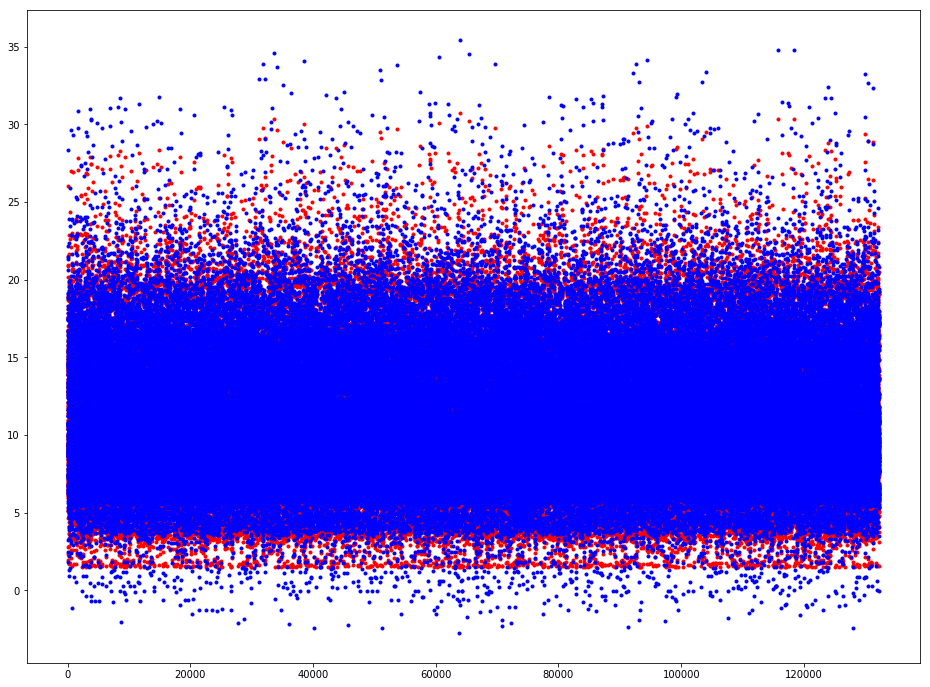

In [297]:
plt.figure(figsize=[16,12])
plt.plot(y_test, 'r.')
plt.plot(y_pred_sklearn, 'b.')
plt.show()

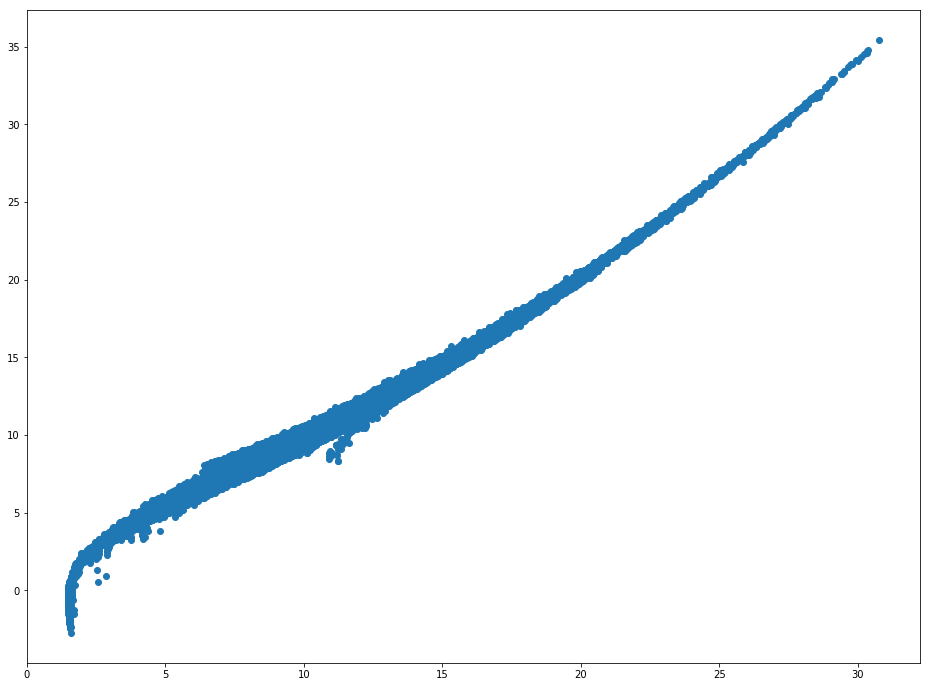

In [298]:
plt.figure(figsize=[16,12])
plt.scatter(y_test, y_pred_sklearn)
plt.show()

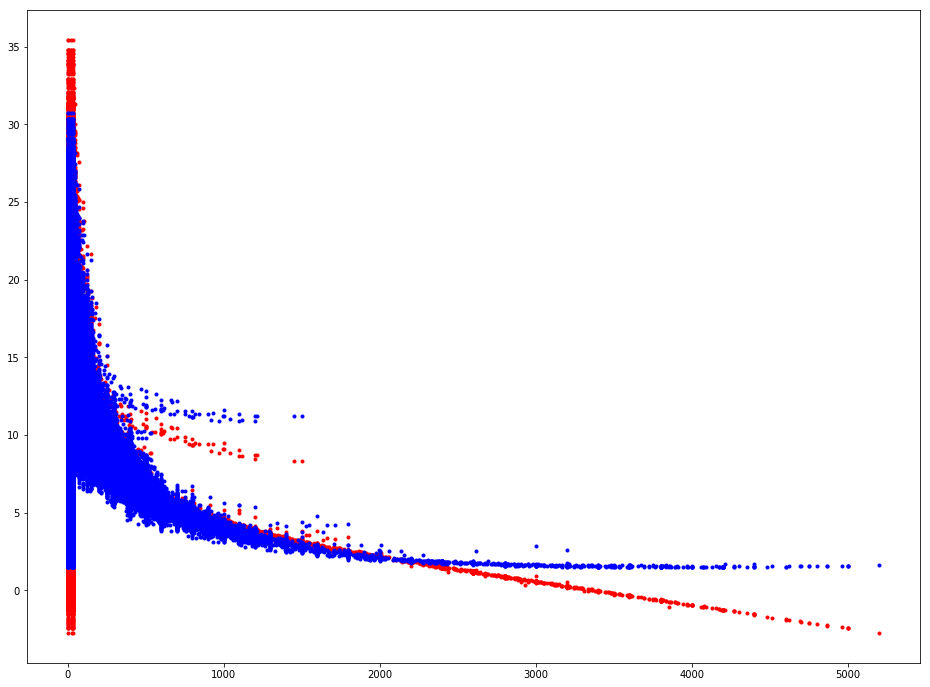

In [375]:
plt.figure(figsize=[16,12])
plt.plot(X_test, y_pred_sklearn, "r.", label= "Predictions")
plt.plot(X_test, y_test, "b.")
plt.show()

# Part D: Gradient Descent Mini Batch

Add column of 1s to X_train_scaled and X_test_scaled

In [376]:
X_train_scaled.shape

(529014, 4)

In [377]:
X_train_scaled_b = np.c_[np.ones((529014,1)),X_train_scaled]

In [378]:
X_train_scaled_b.shape

(529014, 5)

In [379]:
X_test_scaled.shape

(132254, 4)

In [380]:
X_test_scaled_b = np.c_[np.ones((132254,1)), X_test_scaled]

In [381]:
X_test_scaled_b.shape

(132254, 5)

Batch Gradient Descent

In [382]:
eta = 0.1
n_iterations = 1000
m = 529014

In [383]:
theta = np.random.randn(5,1)

In [384]:
for iteration in range(n_iterations):
    gradients = 2/m *X_train_scaled_b.T.dot(X_train_scaled_b.dot(theta)-y_train)
    theta = theta - eta*gradients

In [385]:
theta

array([[ 10.91541795],
       [  1.63046583],
       [ -4.63459104],
       [  0.30206804],
       [ -0.47495541]])

In [386]:
y_pred_bgd = X_test_scaled_b.dot(theta)

In [387]:
metrics.mean_squared_error(y_test, y_pred_bgd)

0.11101117221133872

In [388]:
metrics.r2_score(y_test, y_pred_bgd)

0.99376825035442073

In [389]:
metrics.explained_variance_score(y_test, y_pred_bgd)

0.99376840881488904

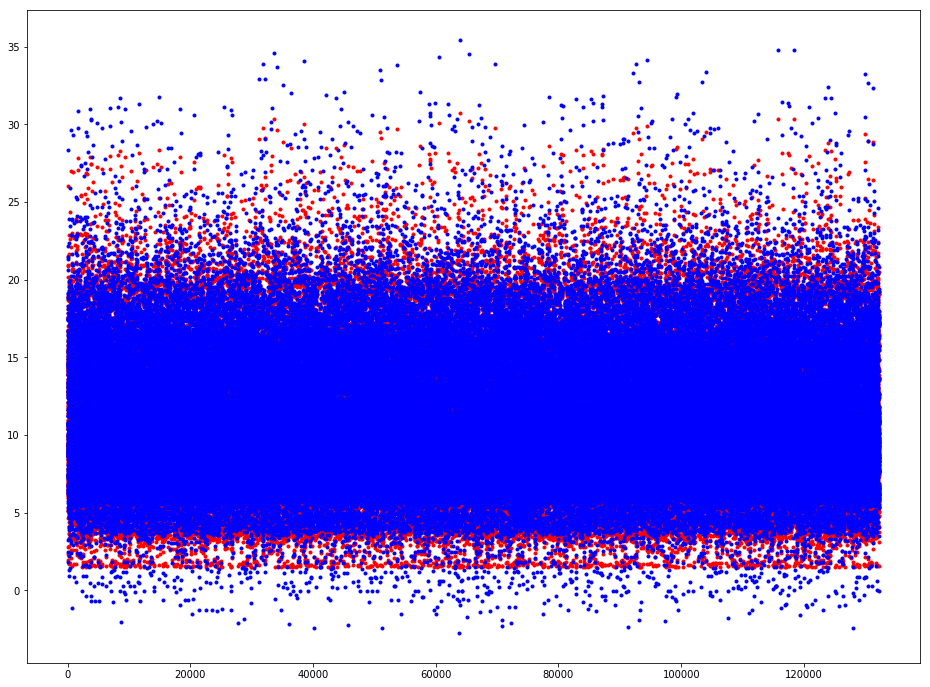

In [390]:
plt.figure(figsize=[16,12])
plt.plot(y_test, 'r.')
plt.plot(y_pred_bgd, 'b.')
plt.show()

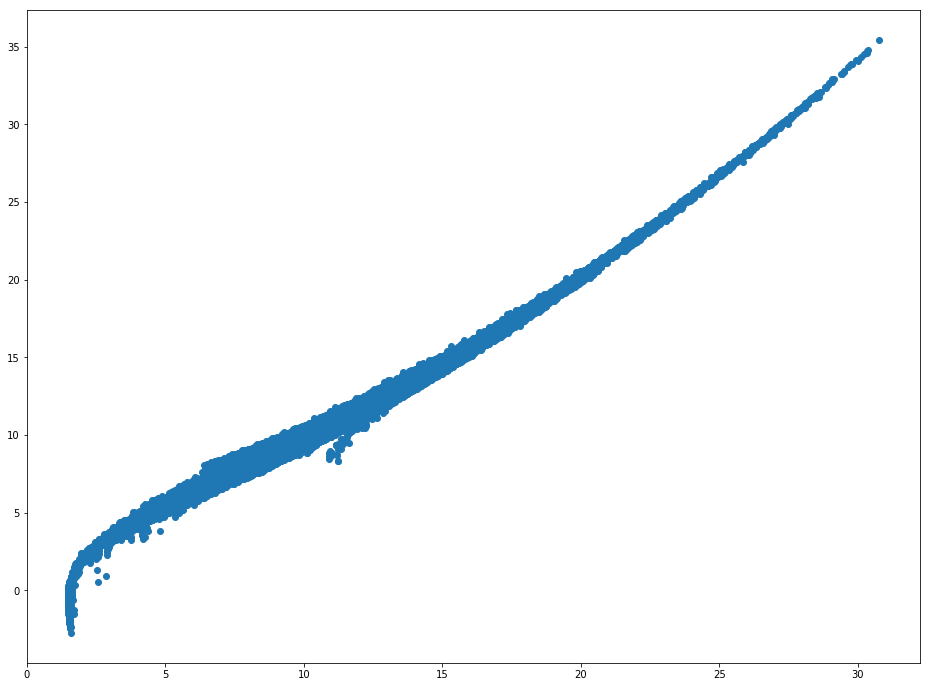

In [391]:
plt.figure(figsize=[16,12])
plt.scatter(y_test, y_pred_bgd)
plt.show()

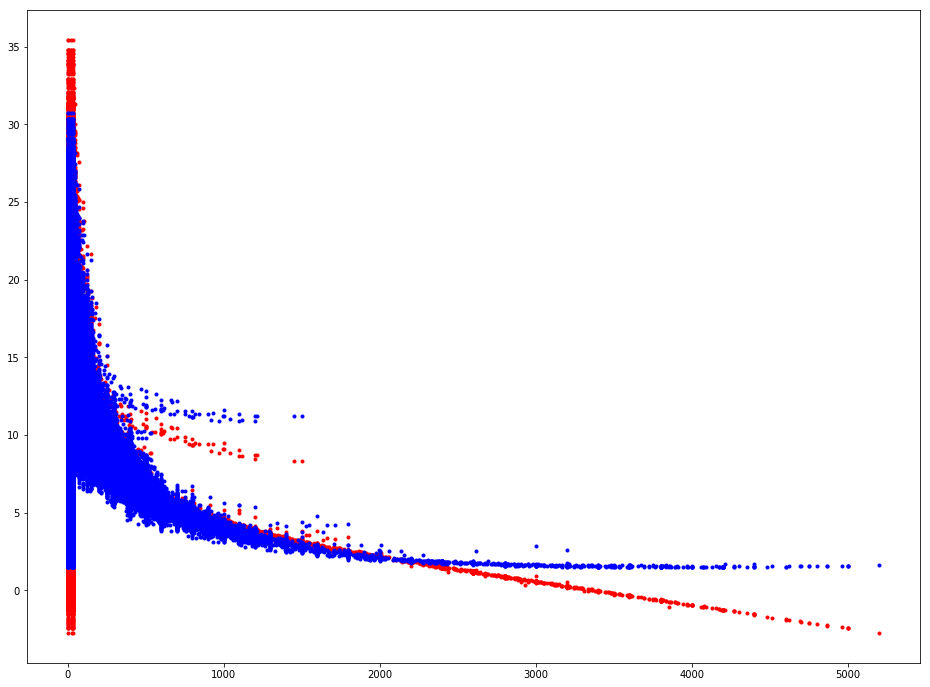

In [392]:
plt.figure(figsize=[16,12])
plt.plot(X_test, y_pred_bgd, "r.", label= "Predictions")
plt.plot(X_test, y_test, "b.")
plt.show()

In [393]:
y_train_pred_bgd = X_train_scaled_b.dot(theta)

In [394]:
metrics.mean_squared_error(y_train, y_train_pred_bgd)

0.11059685129263232

In [395]:
metrics.r2_score(y_train, y_train_pred_bgd)

0.99380576176391588

In [396]:
metrics.explained_variance_score(y_train, y_train_pred_bgd)

0.99380576176391588

Mini Batch Gradient Descent (50 instances per mini batch)

In [397]:
theta_path_mgd = []

In [398]:
n_iterations = 100
minibatch_size = 50

In [399]:
np.random.seed(42)
theta = np.random.randn(5,1)

In [400]:
t = 0
eta = 0.1
for epoch in range(n_iterations):
    shuffled_indicies = np.random.permutation(m)
    X_train_scaled_b_shuffled = X_train_scaled_b[shuffled_indicies]
    y_train_shuffled = y_train[shuffled_indicies]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_train_scaled_b_shuffled[i:i+minibatch_size]
        yi = y_train_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta)- yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [401]:
theta

array([[ 10.94831182],
       [  1.66596957],
       [ -4.69795046],
       [  0.34369036],
       [ -0.37783529]])

In [402]:
y_pred_mbgd = X_test_scaled_b.dot(theta)

In [403]:
metrics.mean_squared_error(y_test, y_pred_mbgd)

0.11849098415820353

In [404]:
metrics.r2_score(y_test, y_pred_mbgd)

0.99334836184662145

In [405]:
metrics.explained_variance_score(y_test, y_pred_mbgd)

0.99340253535940071

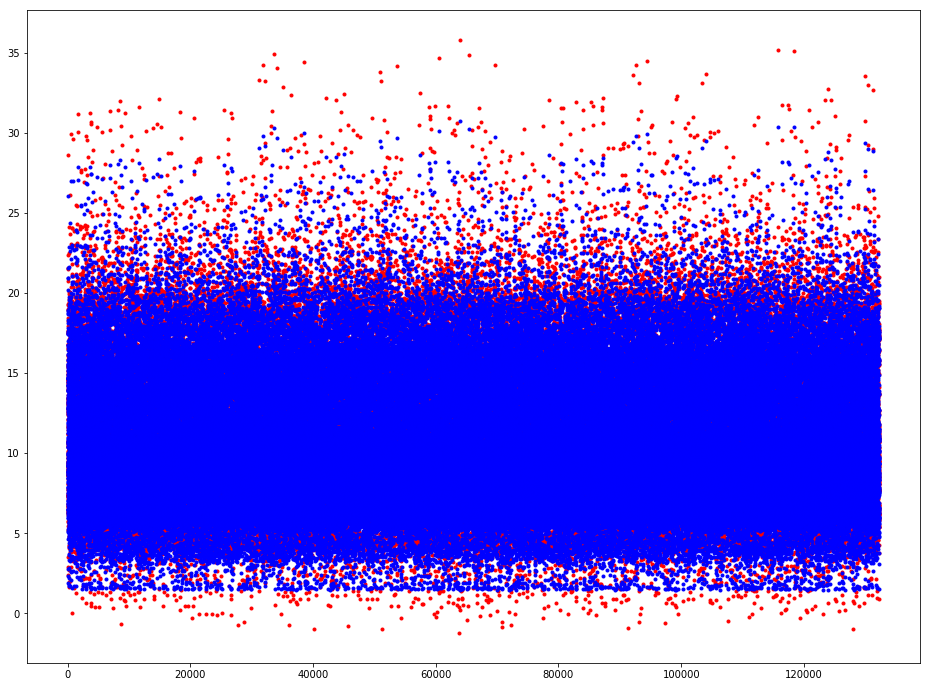

In [406]:
plt.figure(figsize=[16,12])
plt.plot(y_pred_mbgd, "r.")
plt.plot(y_test, "b.")
plt.show()

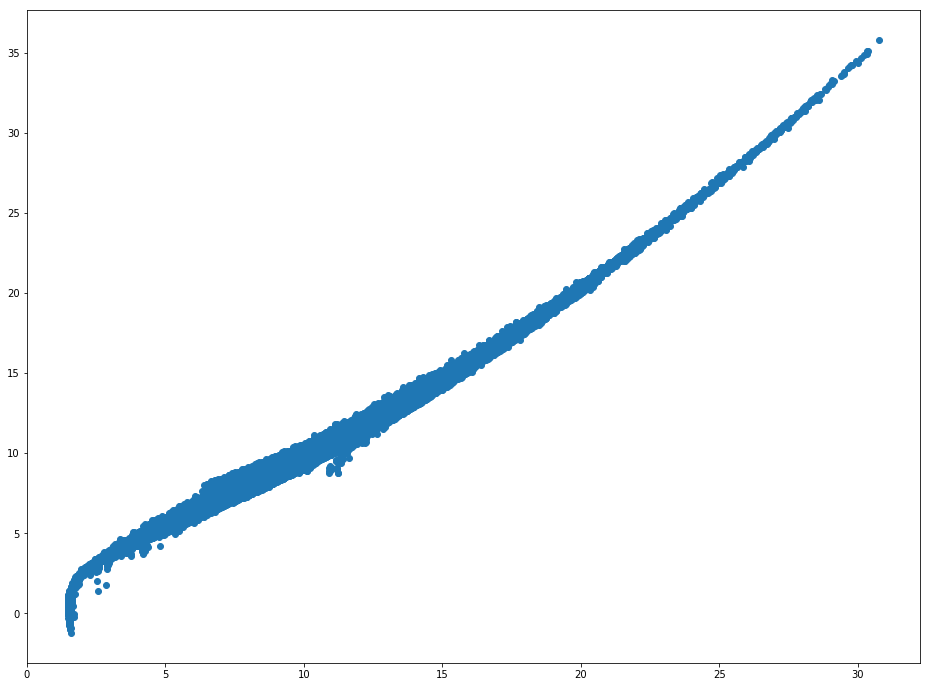

In [407]:
plt.figure(figsize=[16,12])
plt.scatter(y_test, y_pred_mbgd)
plt.show()

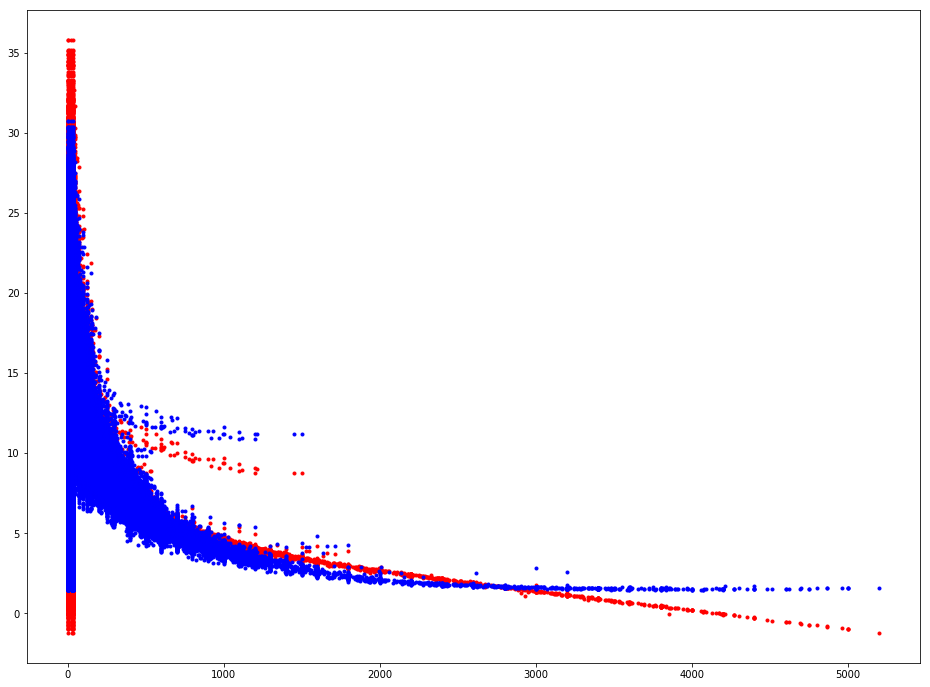

In [408]:
plt.figure(figsize=[16,12])
plt.plot(X_test, y_pred_mbgd, "r.", label= "Predictions")
plt.plot(X_test, y_test, "b.")
plt.show()

In [409]:
y_train_pred_mbgd = X_train_scaled_b.dot(theta)

In [410]:
metrics.mean_squared_error(y_train, y_train_pred_mbgd)

0.11816655068262927

In [411]:
metrics.r2_score(y_train, y_train_pred_mbgd)

0.99338180284601585

In [412]:
metrics.explained_variance_score(y_train, y_train_pred_mbgd)

0.9934424032236262

Mini Batch Gradient Descent (250 instances per mini batch)

In [413]:
theta_path_mgd = []

In [414]:
n_iterations = 100
minibatch_size = 250

In [415]:
np.random.seed(42)
theta = np.random.randn(5,1)

In [416]:
t = 0
eta = 0.1
for epoch in range(n_iterations):
    shuffled_indicies = np.random.permutation(m)
    X_train_scaled_b_shuffled = X_train_scaled_b[shuffled_indicies]
    y_train_shuffled = y_train[shuffled_indicies]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_train_scaled_b_shuffled[i:i+minibatch_size]
        yi = y_train_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta)- yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [417]:
theta

array([[ 10.93058366],
       [  1.64538769],
       [ -4.65645869],
       [  0.31138468],
       [ -0.43051971]])

In [418]:
y_pred_mbgd = X_test_scaled_b.dot(theta)

In [419]:
metrics.mean_squared_error(y_test, y_pred_mbgd)

0.11258212760466112

In [420]:
metrics.r2_score(y_test, y_pred_mbgd)

0.99368006282770116

In [421]:
metrics.explained_variance_score(y_test, y_pred_mbgd)

0.9936901617520405

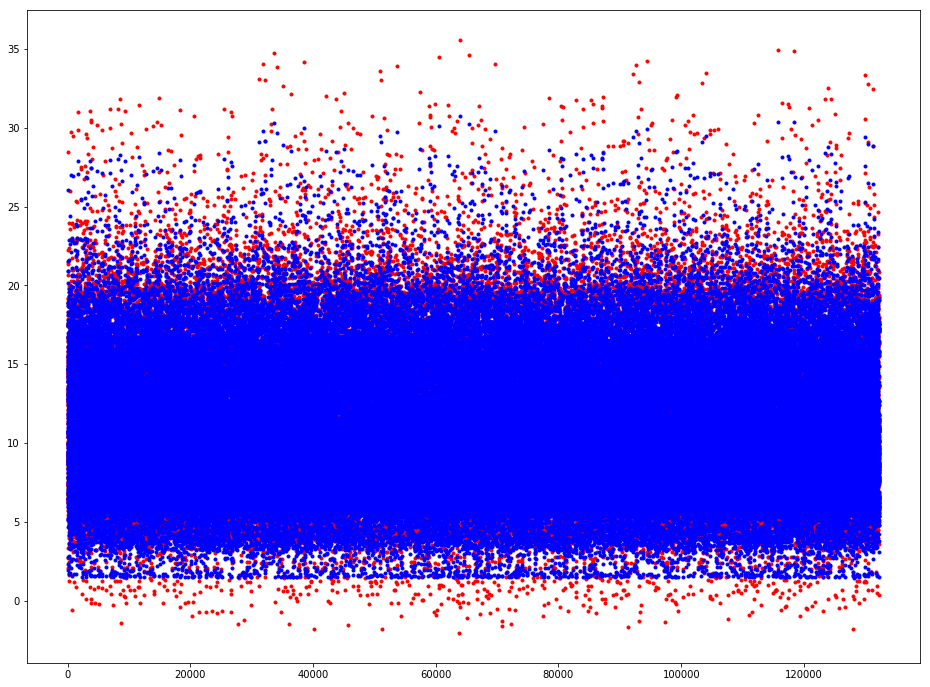

In [422]:
plt.figure(figsize=[16,12])
plt.plot(y_pred_mbgd, "r.")
plt.plot(y_test, "b.")
plt.show()

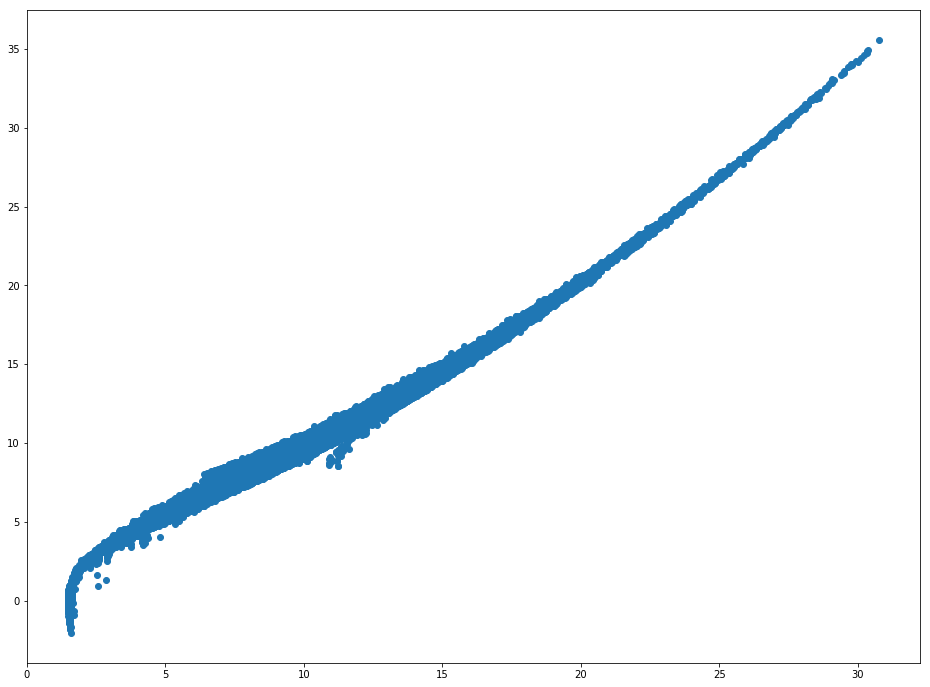

In [423]:
plt.figure(figsize=[16,12])
plt.scatter(y_test, y_pred_mbgd)
plt.show()

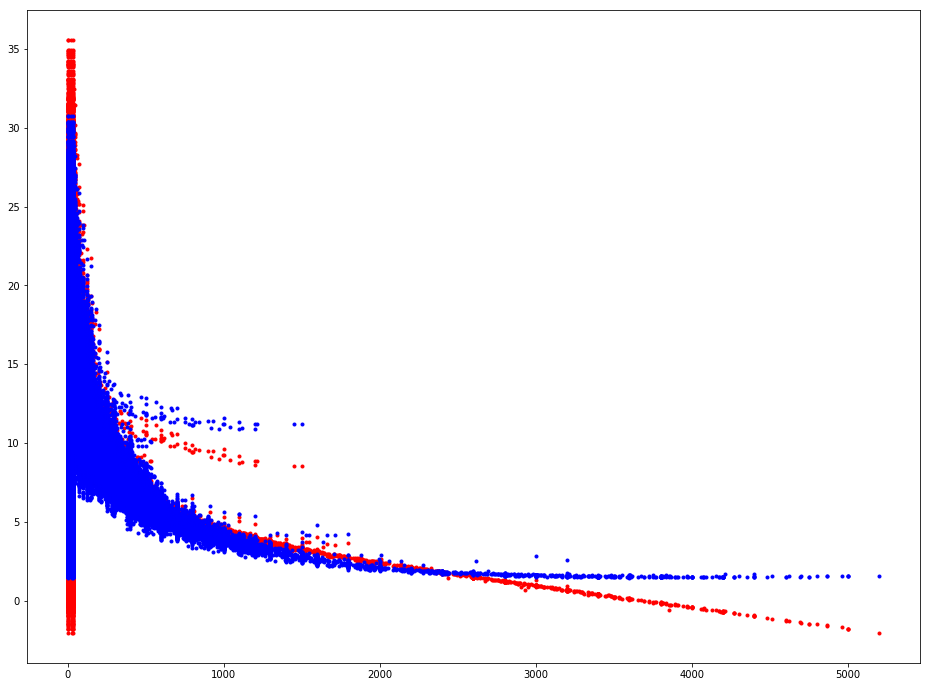

In [424]:
plt.figure(figsize=[16,12])
plt.plot(X_test, y_pred_mbgd, "r.", label= "Predictions")
plt.plot(X_test, y_test, "b.")
plt.show()

In [425]:
y_train_pred_mbgd = X_train_scaled_b.dot(theta)

In [426]:
metrics.mean_squared_error(y_train, y_train_pred_mbgd)

0.11223316404030721

In [427]:
metrics.r2_score(y_train, y_train_pred_mbgd)

0.99371411619833805

In [428]:
metrics.explained_variance_score(y_train, y_train_pred_mbgd)

0.99372699782683194

Mini Batch Gradient Descent (2000 instances per mini batch)

In [429]:
theta_path_mgd = []

In [430]:
n_iterations = 100
minibatch_size = 2000

In [431]:
np.random.seed(42)
theta = np.random.randn(5,1)

In [432]:
t = 0
eta = 0.1
for epoch in range(n_iterations):
    shuffled_indicies = np.random.permutation(m)
    X_train_scaled_b_shuffled = X_train_scaled_b[shuffled_indicies]
    y_train_shuffled = y_train[shuffled_indicies]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_train_scaled_b_shuffled[i:i+minibatch_size]
        yi = y_train_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta)- yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [433]:
theta

array([[ 10.91728431],
       [  1.63566517],
       [ -4.63842578],
       [  0.29970095],
       [ -0.46759502]])

In [434]:
y_pred_mbgd = X_test_scaled_b.dot(theta)

In [435]:
metrics.mean_squared_error(y_test, y_pred_mbgd)

0.11108234889743411

In [436]:
metrics.r2_score(y_test, y_pred_mbgd)

0.99376425476299046

In [437]:
metrics.explained_variance_score(y_test, y_pred_mbgd)

0.99376425664948476

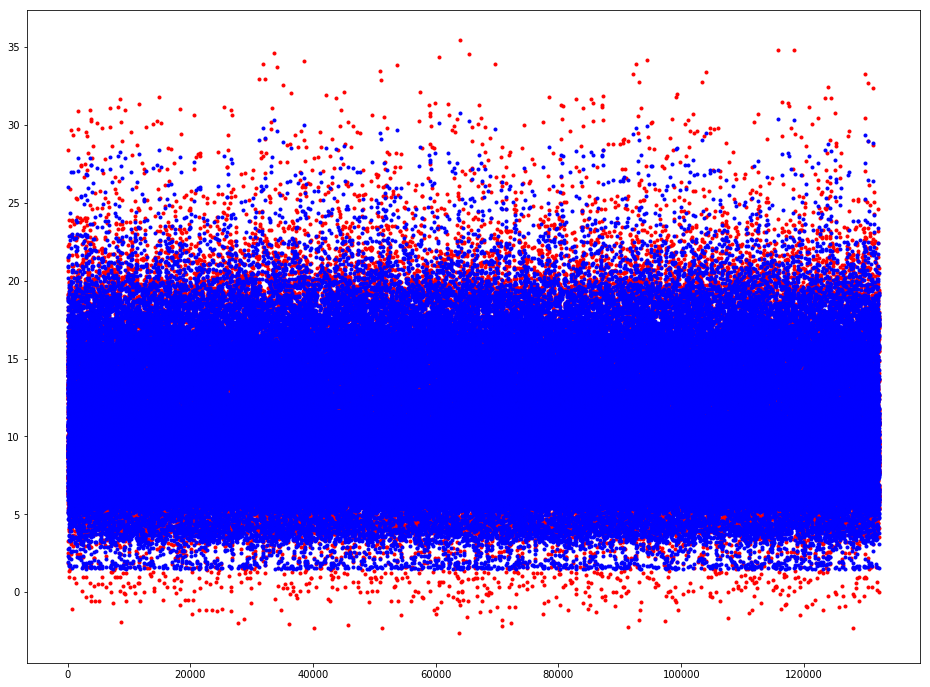

In [438]:
plt.figure(figsize=[16,12])
plt.plot(y_pred_mbgd, "r.")
plt.plot(y_test, "b.")
plt.show()

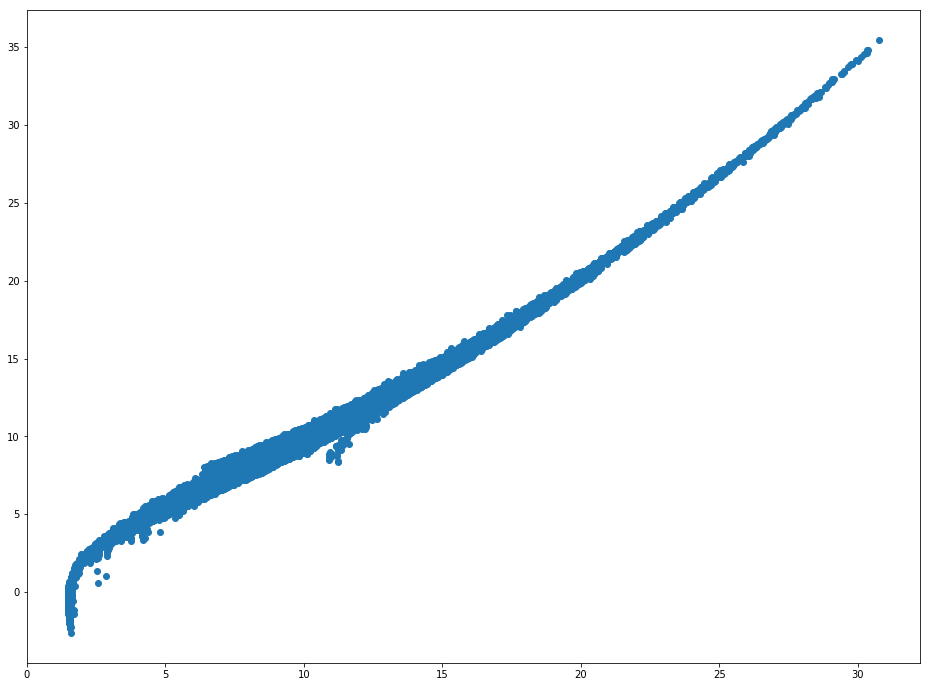

In [439]:
plt.figure(figsize=[16,12])
plt.scatter(y_test, y_pred_mbgd)
plt.show()

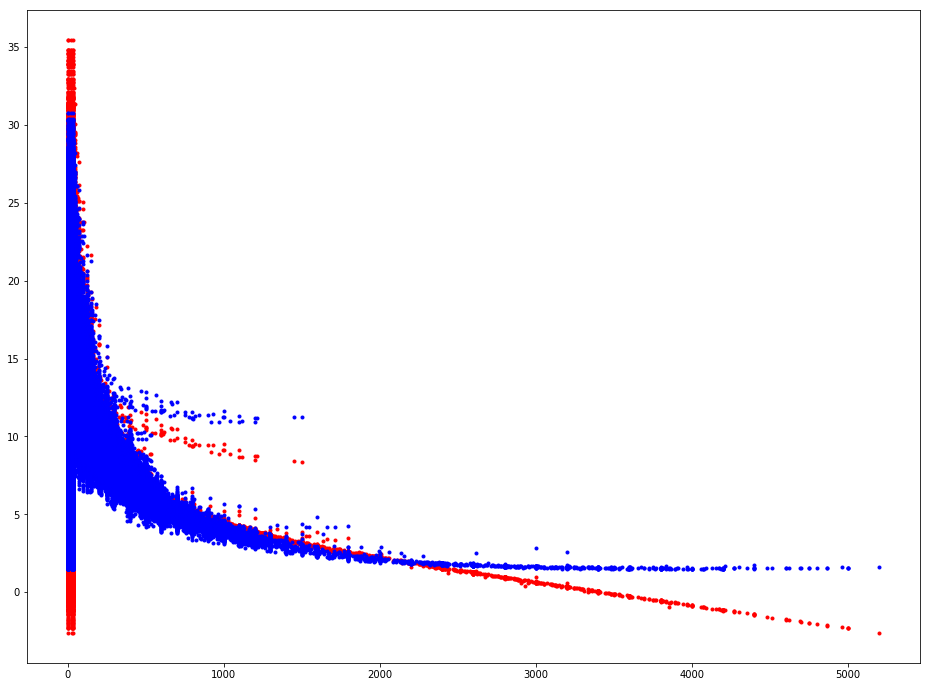

In [440]:
plt.figure(figsize=[16,12])
plt.plot(X_test, y_pred_mbgd, "r.", linewidth=2, label= "Predictions")
plt.plot(X_test, y_test, "b.")
plt.show()

In [441]:
y_train_pred_mbgd = X_train_scaled_b.dot(theta)

In [442]:
metrics.mean_squared_error(y_train, y_train_pred_mbgd)

0.11070418124935597

In [443]:
metrics.r2_score(y_train, y_train_pred_mbgd)

0.99379975049583691

In [444]:
metrics.explained_variance_score(y_train, y_train_pred_mbgd)

0.99379994558717233

# Part E: Conceptual Questions

- Describe how parameter estimation in Gradient Descent differs from using the normal equation

The normal equation is a closed form solution in that it produces the result directly.  Gradient Descent involves an iterative process that reaches the result gradually by tweaking parameters until the cost function is minimized

- How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

Stochastic Gradient Descent picks a random instance from the training set in every step and computes the gradients using that.  It is seen as a faster method than Gradient Descent because it does not use the full training set in each step.  It also is seen as a good method for escaping local minimums because of it's randomness.  However, it often does not achienve the optimal final result.


Mini-Batch Gradient Descent provides a performance boost by selecting subsets of the training data to be used for computing the gradient at each step in training.  This size of training instances is the main difference between SGD and MBGD.

- Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs. training data.  Does this version of gradient descent show signs of overfitting? Explain

Of the Mini-Batch Gradient Descent versions, the 2000 mini-batch version performed the best with .99376 r2 and explained variance scores, and .111 MSE for the test data.  This version had a .99379 r2 and explained variance scoreand .110 MSE for it's training data.  This version does show slight signs of overfitting because it's MSE is slightly higher on the test set than on the training set.

- Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

Learning rate controls the size of the step in your descent down the gradient.  It may be helpful to increase or decrease this if you feel the epochs are descending too slowly or quickly along the function.  A learning rate is multiplied with the gradient vector to control the next downhill step

- Why would a data scientist want to use early stopping in gradient descent?

Early stopping can be used as a method of regulation to help with reducing variance/improving generalization.  Early stopping would stop training as soon as the validation error reaches a minimum and prevent overfitting to the training set